# ED22B052_Lab9 Linear Regression

#### Q4.Using steepest gradient descent, find all the local minima for the function  J(x1, x2) = (5*x1)^2+(x2)^2. While applying gradient descent, do the following (a) Fixing the value for alpha (b) use line search to determine the value for alpha. Plot the intermediate steps in the iteration to show one of the minimal point.

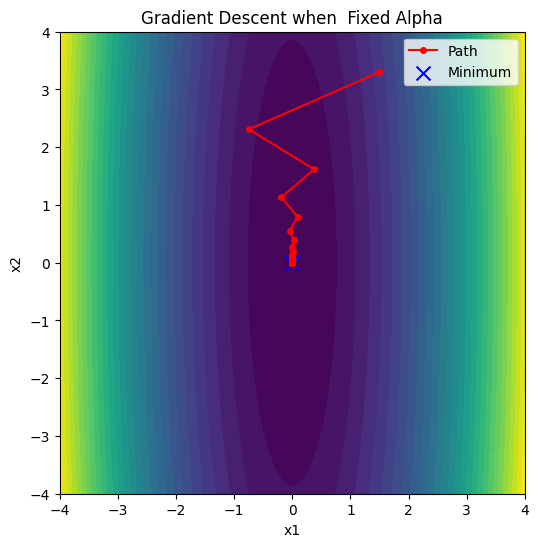

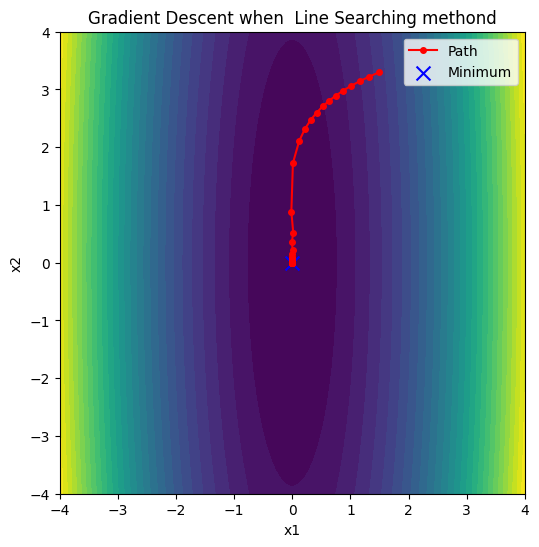

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def J(x1, x2):
    return (5*x1)**2 + (x2)**2
    
# grad(J(x1, x2)) = dJ(x1,x2)/dx1 + dJ(x1,x2)/dx2
def gradient(x1, x2):
    return np.array([10*x1, 2*x2])
    
# grad descent function for const alpha 
def gradient_descent_fixed_alpha(x_initial, alpha=0.15, tol=1e-6, max_iter=100):
    x_vals = [x_initial]
    x = np.array(x_initial)
    
    for _ in range(max_iter):
        grad = gradient(*x)
        x_new = x - alpha * grad
        x_vals.append(x_new)
        
        if np.linalg.norm(grad) < tol:
            break
        
        x = x_new
    
    return np.array(x_vals)
    
# grad descent function for line seaarching 
def gradient_descent_line_search(x_initial, tol=1e-6, max_iter=100):
    x_vals = [x_initial]
    x = np.array(x_initial)
    
    for _ in range(max_iter):
        grad = gradient(*x)
        
        # Line search: optimal alpha = (grad . grad) / (grad . Hessian . grad)
        # Since Hessian is diagonal [10, 2], we get:
        alpha = (grad @ grad) / ((10 * grad[0])**2 + (2 * grad[1])**2)
        
        x_new = x - alpha * grad
        x_vals.append(x_new)
        
        if np.linalg.norm(grad) < tol:
            break
        
        x = x_new
    
    return np.array(x_vals)

def plot_descent(x_vals, title):
    x_vals = np.array(x_vals)
    plt.figure(figsize=(6,6))
    plt.contourf(X1, X2, J_vals, levels=30, cmap='viridis')
    plt.plot(x_vals[:,0], x_vals[:,1], 'ro-', markersize=4, label='Path')
    plt.scatter([0], [0], color='blue', marker='x', s=100, label='Minimum')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    plt.legend()
    plt.show()

# Generate contour plot for function
x1_range = np.linspace(-4, 4, 100)
x2_range = np.linspace(-4, 4, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
J_vals = J(X1, X2)

# Initial point
x_initial = [1.5, 3.3]

# Run both gradient descent methods
x_vals_fixed = gradient_descent_fixed_alpha(x_initial)
x_vals_line_search = gradient_descent_line_search(x_initial)

# Plot results
plot_descent(x_vals_fixed, "Gradient Descent when  Fixed Alpha")
plot_descent(x_vals_line_search, "Gradient Descent when  Line Searching methond")


#### Q1) Implement the linear regression for the univariate problem using gradient descent for the attached data file ice_cream_sales_vs_temperature.csv. Plot the cost function and the best-fit line. (you can only use numpy and pandas library).

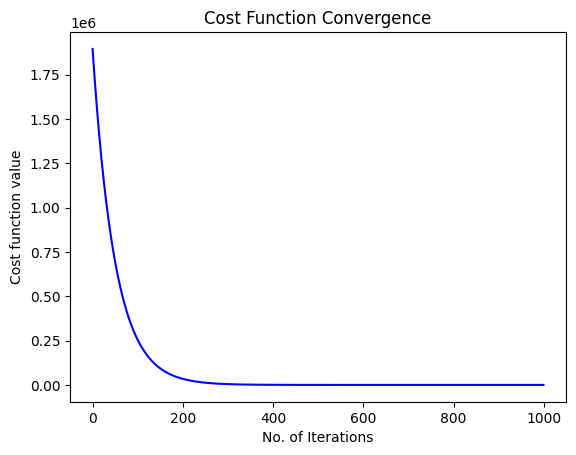

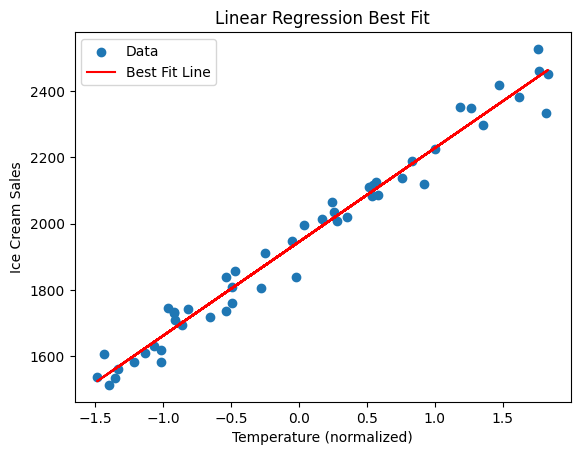

Optimal Parameters: [1945.69263851  282.77269012]


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('ice_cream_sales_vs_temperature.csv')
X = data.iloc[:, 0].values  # Temperature_C means 0th Column
y = data.iloc[:, 1].values  # Ice_cream_sales means 1st Column

# Normalize features
X = (X - np.mean(X)) / np.std(X)
m = len(y)
X = X.reshape(m, 1)  # Reshape for matrix operations
y = y.reshape(m, 1)

# Add intercept term
X_b = np.c_[np.ones((m, 1)), X]

# assueme Initialize parameters
angle = np.zeros((2, 1))
learning_rate = 0.01
iterations = 1000

# Cost function according to the given 
def compute_cost_fxn(X, y, angle):
    m = len(y)
    predictions = X.dot(angle)
    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    return cost

# function for gradient desceny 
def grad_desc_fxn(X, y, angle, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        gradients = (1 / m) * X.T.dot(X.dot(angle) - y)
        angle -= learning_rate * gradients
        cost_history.append(compute_cost_fxn(X, y, angle))
    return angle, cost_history

# Run gradient descent
optimal_angle, cost_history = grad_desc_fxn(X_b, y, angle, learning_rate, iterations)

# Plot cost function
plt.plot(range(iterations), cost_history, 'b')
plt.xlabel('No. of Iterations')
plt.ylabel('Cost function value')
plt.title('Cost Function Convergence')
plt.show()

# Plot best-fit line
plt.scatter(X, y, label='Data')
plt.plot(X, X_b.dot(optimal_angle), color='red', label='Best Fit Line')
plt.xlabel('Temperature (normalized)')
plt.ylabel('Ice Cream Sales')
plt.title('Linear Regression Best Fit')
plt.legend()
plt.show()

print(f'Optimal Parameters: {optimal_angle.flatten()}')


#### Q3) Fit polynomial equations of degree 1  to 4  for the given data noisy_point_data.csv.  Determine the values of coefficients that minimize the residual error(RMSE). Plot the original data with your best-fit line. Explain why your chosen polynomial degree is appropriate for this data Also, find the nature of the curve.

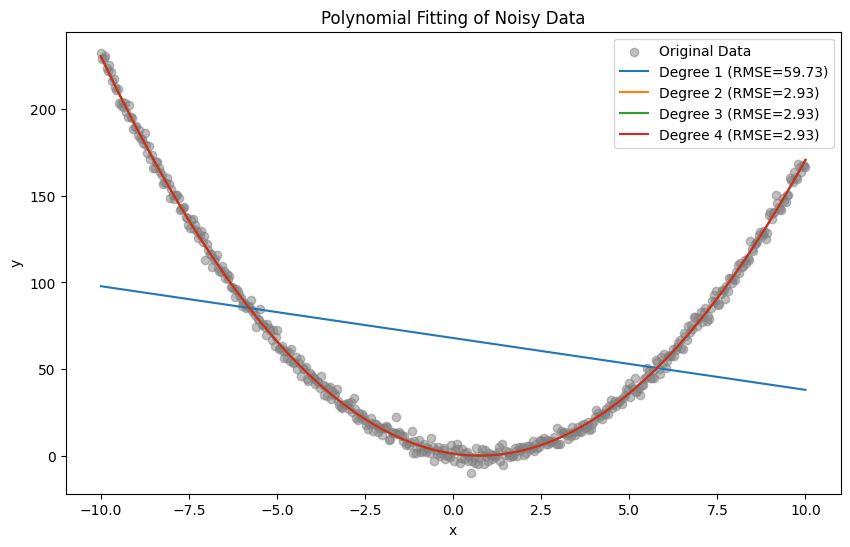

Best polynomial degree: 4
Coefficients: [ 0.00000000e+00 -2.98622296e+00  1.99316637e+00 -4.46950524e-05
 -1.97747327e-06]
Intercept: 1.2532013162354048


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the CSV file
file_path = "noisy_point_data.csv"
data = pd.read_csv(file_path)

# Extract x and y values
x_values = data["x"].values.reshape(-1, 1)
y_values = data["y"].values

# Dictionary to store RMSE values
rmse_scores = {}

# Fit polynomials of degrees 1 to 4
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color="gray", alpha=0.5, label="Original Data")

best_degree = None
smallest_rmse = float("inf")

for degree in range(1, 5):
    poly_transformer = PolynomialFeatures(degree)
    x_poly = poly_transformer.fit_transform(x_values)
    
    poly_model = LinearRegression()
    poly_model.fit(x_poly, y_values)
    y_predicted = poly_model.predict(x_poly)
    
    rmse = np.sqrt(mean_squared_error(y_values, y_predicted))
    rmse_scores[degree] = rmse

    # Plot each fitted polynomial
    sorted_indices = np.argsort(x_values[:, 0])
    plt.plot(x_values[sorted_indices], y_predicted[sorted_indices], label=f"Degree {degree} (RMSE={rmse:.2f})")

    # Determine the best degree based on RMSE
    if rmse < smallest_rmse:
        smallest_rmse = rmse
        best_degree = degree

plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Fitting of Noisy Data")
plt.legend()
plt.show()

# Fit the best polynomial model
best_poly_transformer = PolynomialFeatures(best_degree)
x_best_poly = best_poly_transformer.fit_transform(x_values)

best_poly_model = LinearRegression()
best_poly_model.fit(x_best_poly, y_values)

# get the coefficients
best_poly_coefficients = best_poly_model.coef_
best_poly_intercept = best_poly_model.intercept_

print(f"Best polynomial degree: {best_degree}")
print(f"Coefficients: {best_poly_coefficients}")
print(f"Intercept: {best_poly_intercept}")


#### Q2) Using the given dataset, 3D_printing_data.csv,  find how the 3D printing parameters (layer height, wall thickness, infill density, nozzle temperature, bed temperature, print speed, material, and fan speed) affect the tensile strength of the printed object. (Do the necessary data cleaning and preprocessing before performing the linear regression)

In [24]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import r2_score  

# Load the dataset from the given file
file_path = "3D_printing_data.csv"  
df = pd.read_csv(file_path)  

# Fixing spelling mistake
df.rename(columns={"tension_strenght": "tensile_strength"}, inplace=True) 

# Changing text to numbers
df = pd.get_dummies(df, columns=["infill_pattern", "material"], drop_first=True)  

# Select the inputs (X) and the target/output (y)
# "tensile_strength" is what we want to predict
# We remove "roughness" and "elongation" as they are not needed
X = df.drop(columns=["tensile_strength", "roughness", "elongation"])
y = df["tensile_strength"]

# model training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model and train it
model = LinearRegression() 
model.fit(X_train, y_train)  

# Predict tensile strength for test data
y_pred = model.predict(X_test)  

# R² score shows how well the model works
r2_score_value = r2_score(y_test, y_pred)  

# Match features to their impact
coefficients = dict(zip(X.columns, model.coef_)) 

# Show results
print("Model Performance (R² Score):", r2_score_value)
print("\nEffect of Each Printing Parameter on Tensile Strength:")
for feature, coef in coefficients.items():
    print(f"{feature}: {coef:.4f}")  # Print each factor's impact in an easy-to-read format


Model Performance (R² Score): 0.4357450684115648

Effect of Each Printing Parameter on Tensile Strength:
layer_height: 61.1921
wall_thickness: 0.7885
infill_density: 0.1663
nozzle_temperature: -1.0234
bed_temperature: 0.0359
print_speed: -0.0031
fan_speed: 0.1796
infill_pattern_honeycomb: -1.3094
material_pla: -15.4049
